# Ultimate Technologies Inc. Take-Home Challenge

## Importing Libraries & Load Data

In [1]:
# Import Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Import Modeling Libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from scipy.stats import ttest_ind

from copy import deepcopy

In [3]:
# Accessing Google Drive by mounting it locally
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Location on Google Drive
repo = 'challenge_ultimate'
%cd /content/drive/MyDrive/colab_notebooks/GitHub/{repo}/

# Load data files into pandas
logins = pd.read_json('logins.json',convert_dates=True)
ultimate = pd.read_json('ultimate_data_challenge.json')

/content/drive/MyDrive/colab_notebooks/GitHub/challenge_ultimate


In [5]:
# Unmount Google Drive.
drive.flush_and_unmount()

In [10]:
# Creating a Counter for logins by 15-minute intervals.
logins_count = deepcopy(logins)
logins_count["count"] = 1
logins_count = logins_count.set_index("login_time")
logins_count_15min = logins_count.groupby(pd.Grouper(freq="15Min")).sum()
logins_count_15min.index.name = "DateTime"

In [13]:
# Creating a Counter for logins by day intervals.
logins_count_day = logins_count_15min.groupby(logins_count_15min.index.date).mean()
logins_count_day = logins_count_day[1 : -1]
logins_count_day.index.name = "Date"

Text(0.5, 1.0, 'Login rate by day')

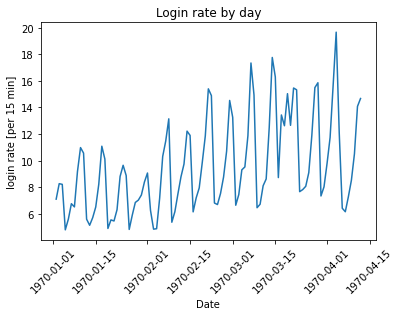

In [14]:
# Creating plot of login count by day.
logins_count_day.plot(y="count", rot=45, legend=None)
plt.ylabel("login rate [per 15 min]")
plt.title("Login rate by day")